## Antimeridian in GeoPandas, matplotlib, folium, leafmap, and anymap. 

In [1]:
# !pip install geopandas folium leafmap anymap

### GeoPandas

<Axes: >

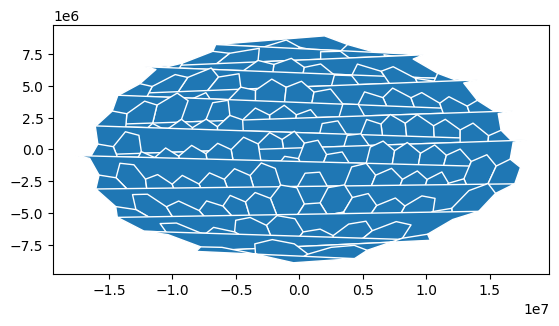

In [2]:
import geopandas as gpd

# Load the GeoJSON data
geojson_path = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
gdf = gpd.read_file(geojson_path)
# gdf.plot(edgecolor="white", linewidth=1)
gdf.to_crs("ESRI:54009").plot(edgecolor="white", linewidth=1)


### matplotlib

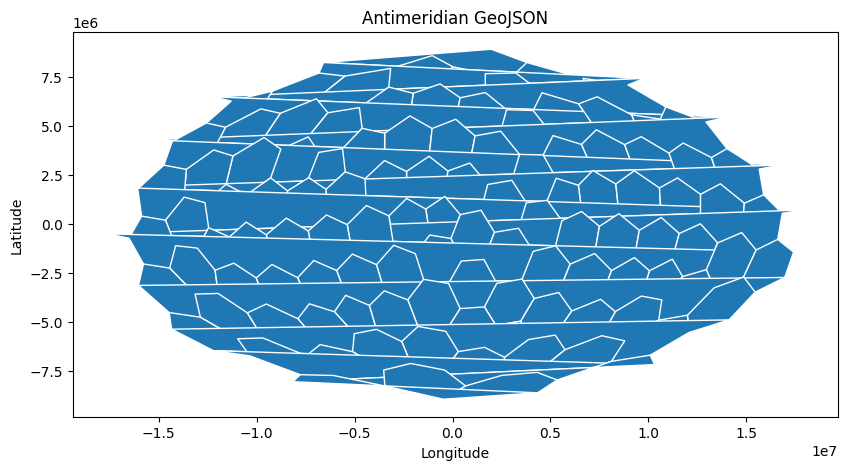

In [3]:
import matplotlib.pyplot as plt

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
# crs = 'EPSG:4326'
crs = 'proj=moll'
gdf.to_crs(crs).plot(ax=ax, edgecolor="white")
ax.set_title("Antimeridian GeoJSON")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal', adjustable='box')
plt.show()


### folium

In [4]:
import folium

m_folium = folium.Map(location=[0, 0], zoom_start=1)
folium.GeoJson(
    gdf.to_json(),
    name="H3",
    style_function=lambda feature: {
        "color": "black",
        "weight": 1,
        "fillColor": "blue",
        "fillOpacity": 0.4
    },
).add_to(m_folium)

folium.LayerControl().add_to(m_folium)
m_folium



### leafmap

In [5]:
import leafmap

m = leafmap.Map(zoom=0)
m.add_gdf(gdf, layer_name="H3", style=dict(color="black", fillColor="blue", fillOpacity=0.4))
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### AnyMap

#### AnyMap CesiumMap

In [6]:
from anymap import CesiumMap
import os 
# Set your Cesium token (get a free one at https://cesium.com/ion/signup)
# You can either set it as an environment variable CESIUM_TOKEN or pass it directly
# os.environ['CESIUM_TOKEN'] = 'your_token_here'

h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_shift_west.geojson"

globe = CesiumMap(
    center=[0,0],  
    # camera_height=2000000,  # 2000 km above surface
    width="100%",
    height="500px",
    navigation_help_button=True,
)
globe.add_geojson(
    h3_geojson, options={"name": "H3", "clampToGround": True}
)


globe


CesiumMap(center=[0, 0], height='500px', navigation_help_button=True)

#### Anymap DeckGL 

In [10]:
from anymap.maplibre import MapLibreMap

# Create a MapLibre map
m = MapLibreMap(
    center=[0,0], 
    zoom=0,
    style="https://raw.githubusercontent.com/opengeoshub/vstyles/main/versatiles/eclipse.json",
)

h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"

m.add_deckgl_layer(
    "h3",
    "GeoJsonLayer",
    h3_geojson,
    props={
        "pickable": True,
        "stroked": True,
        "filled": False,
        "getLineColor": [255, 0, 0],
        "getPointRadius": 80,
        "lineWidthMinPixels": 2,
    },
)


m

MapLibreMap(center=[0, 0], geoman_data={'type': 'FeatureCollection', 'features': []}, height='680px', style={'…

#### AnyMap KeplerGLMap

In [12]:
import anymap

# Create KeplerGL map with data
kepler = anymap.KeplerGLMap(center=[0,0], zoom=0, height="500px")

# Does not support url, polyline and polygon
h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
kepler.add_geojson(h3_geojson, "h3")

# Display the interactive map
kepler

KeplerGLMap(center=[0, 0], height='500px', map_config={'version': 'v1', 'config': {'mapState': {'latitude': 0,…

#### AnyMap LeafletMap

In [13]:
import anymap
leaflet_map = anymap.LeafletMap(
    center=[0,0], zoom=0, width="100%", height="500px",tile_layer="CartoDB.DarkMatter"
)
h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
leaflet_map.add_geojson(
    h3_geojson, 
    style={"color": "red", "weight": 2}
)
leaflet_map


LeafletMap(center=[0, 0], height='500px', tile_layer='CartoDB.DarkMatter', zoom=0.0)

#### AnyMap MapLibreMap

In [14]:
from anymap import MapLibreMap
# Create a basic map
m = MapLibreMap(
    center=[0,0],
    zoom=0,
    height="500px"
)
h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
# Add the H3 source
m.add_source("h3-source", {"type": "geojson", "data": h3_geojson})

# Add an outline
m.add_layer(
    {
        "id": "h3-outline",
        "type": "line",
        "source": "h3-source",
        "paint": {"line-color": "red", "line-width": 2},
    }
)
m

MapLibreMap(center=[0, 0], geoman_data={'type': 'FeatureCollection', 'features': []}, height='500px', style='h…

#### AnyMap MapboxMap

In [ ]:
from anymap import MapboxMap
import os
# Note: You need a Mapbox access token to use the Mapbox backend
# Get a free token at https://account.mapbox.com/access-tokens/
# Set it as an environment variable: os.environ['MAPBOX_TOKEN'] = 'your_token_here'
# Or pass it directly when creating the map: MapboxMap(access_token="your_token")
m = MapboxMap(
    center=[0,0],  # San Francisco
    zoom=0,
    height="500px",
    style="https://raw.githubusercontent.com/opengeoshub/vstyles/main/versatiles/eclipse.json",
    # style="mapbox://styles/mapbox/streets-v12",
    # access_token="your_access_token"  # Replace with your actual token for mapbox style
)
h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"

m.add_geojson_layer(
    "h3", h3_geojson, "line", {"line-color": "red", "line-width": 2}
)

m


#### AnyMap OpenLayersMap

In [17]:
import anymap
# Create a basic OpenLayers map
ol_map = anymap.OpenLayersMap(
    center=[0,0],  
    zoom=0,
    width="100%",
    height="500px",
    tile_layer="CartoDB.DarkMatter"
)

h3_geojson = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
ol_map.add_geojson(
    h3_geojson,
    style={"line": {"color": "red", "width": 2}},
)
ol_map

OpenLayersMap(center=[0, 0], height='500px', tile_layer='CartoDB.DarkMatter', zoom=0.0)